ASSIGNMENT 1


Take image split channels

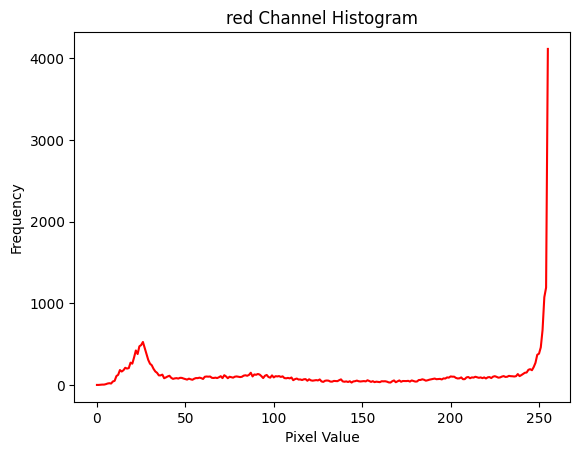

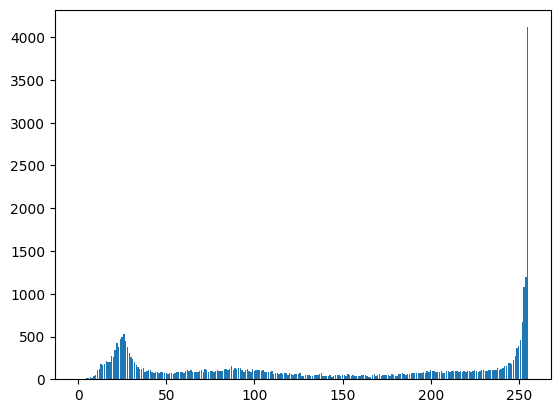

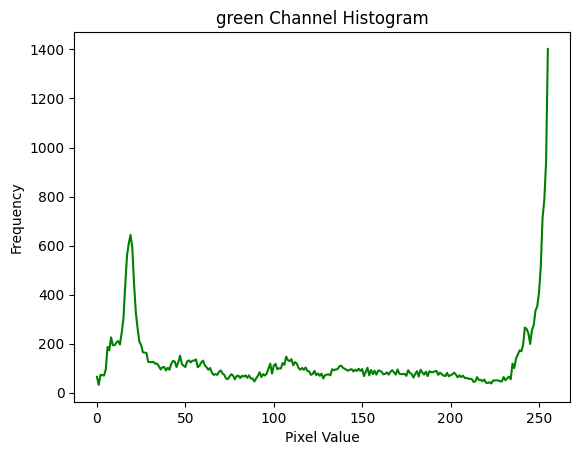

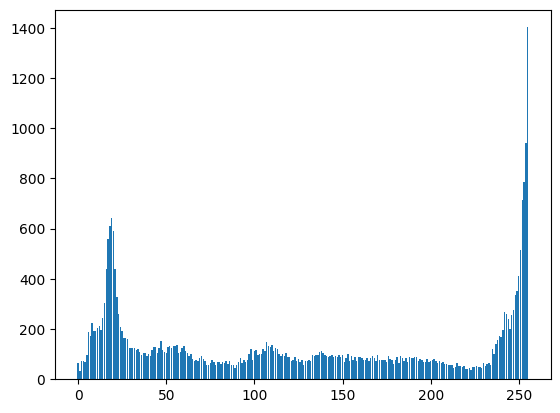

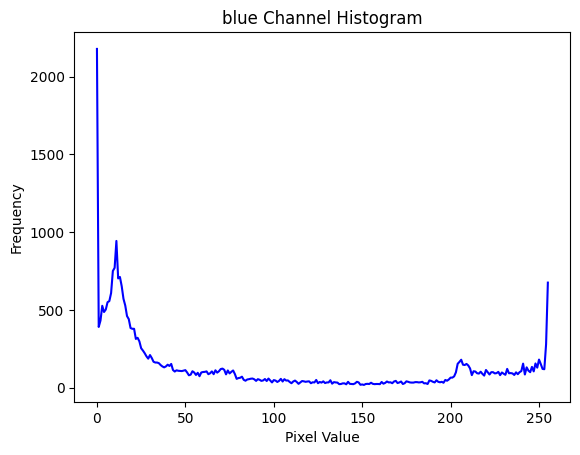

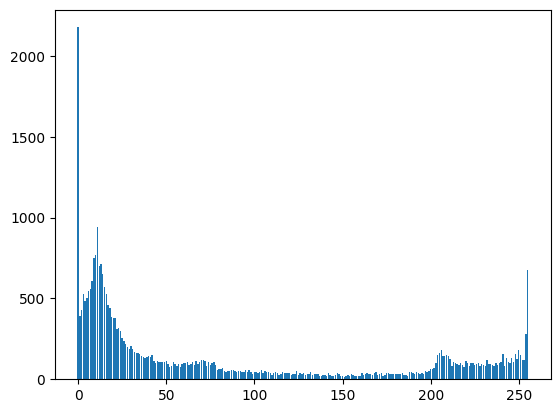

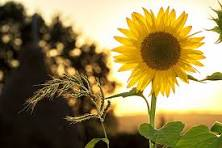

Image Matrix (top-left corner):
[[[178 235 244]
  [188 245 254]
  [198 255 255]
  [197 254 255]
  [188 243 252]]

 [[180 235 244]
  [184 239 248]
  [189 244 253]
  [188 243 252]
  [178 231 241]]

 [[171 220 228]
  [175 224 232]
  [179 228 236]
  [178 227 235]
  [165 212 220]]

 [[150 194 201]
  [159 203 210]
  [167 211 218]
  [161 205 212]
  [135 179 186]]

 [[131 169 174]
  [140 178 183]
  [143 181 186]
  [123 161 166]
  [ 85 123 128]]]


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

def separate_channels(image):
    b, g, r = cv2.split(image)
    return r, g, b  # OpenCV reads images in BGR format, so swapping channels to RGB

def plot_histogram(channel, color):
    histogram = cv2.calcHist([channel], [0], None, [256], [0, 256])
    plt.plot(histogram, color=color)
    plt.title(f'{color} Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()
    plt.bar(list(range(0,histogram.shape[0])),histogram[:,0])
    plt.show()

def main():
    # Input image file path
    image_path ='/content/drive/MyDrive/images.jpg'

    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Separate the channels
    r_channel, g_channel, b_channel = separate_channels(image)

    # Plot histograms for each channel
    plot_histogram(r_channel, 'red')
    plot_histogram(g_channel, 'green')
    plot_histogram(b_channel, 'blue')

    cv2_imshow(image)
    print("Image Matrix (top-left corner):")
    print(image[:5, :5, :])


if __name__ == "__main__":
    main()


assignment 2


save to jpg,png,raw

In [3]:
import cv2
from PIL import Image

def save_png_and_jpg(input_image_path, output_png_path, output_jpg_path):
    # Open the image using Pillow
    img = Image.open(input_image_path)

    # Save the image as PNG
    img.save(output_png_path, format='PNG')

    # Save the image as JPEG
    img.save(output_jpg_path, format='JPEG')

def save_raw_image(input_image_path, output_raw_path):
    # Read the input image using OpenCV
    img = cv2.imread(input_image_path)

    # Convert the image to grayscale if it's not already
    if len(img.shape) > 2:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Save the image in raw format using OpenCV
    with open(output_raw_path, 'wb') as f:
        f.write(img)

# Prompt user to input the path of the input image
input_image_path = input("Enter the path of the input image: ")

# Generate output file paths
output_png_path = input_image_path.split('.')[0] + "_converted.png"
output_jpg_path = input_image_path.split('.')[0] + "_converted.jpg"
output_raw_path = input_image_path.split('.')[0] + "_converted.raw"

# Save the input image in PNG, JPEG, and RAW formats
save_png_and_jpg(input_image_path, output_png_path, output_jpg_path)
save_raw_image(input_image_path, output_raw_path)

print("Images saved successfully!")


Enter the path of the input image: /content/drive/MyDrive/images.jpg
Images saved successfully!


assignment 3


add noise generate g



Enter the path of the input image: /content/drive/MyDrive/images.jpg


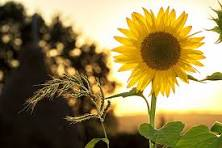

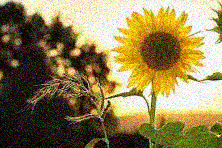

-1

In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Function to add noise to an image
def add_noise(image, noise_type='gaussian', mean=0, sigma=25):
    if noise_type == 'gaussian':
        row, col, ch = image.shape
        gauss = np.random.normal(mean, sigma, (row, col, ch))
        noisy = image + gauss
        return np.clip(noisy, 0, 255).astype(np.uint8)
    elif noise_type == 'salt_and_pepper':
        row, col, ch = image.shape
        s_vs_p = 0.5
        amount = 0.04
        out = np.copy(image)

        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
        out[coords] = 255

        # Pepper mode
        num_pepper = np.ceil(amount * image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
        out[coords] = 0
        return out.astype(np.uint8)
    else:
        raise ValueError("Noise type not recognized. Choose 'gaussian' or 'salt_and_pepper'.")

# Read input image
input_image_path = input("Enter the path of the input image: ")
input_image = cv2.imread(input_image_path)

# Add noise to the input image
noisy_image = add_noise(input_image, noise_type='gaussian', mean=0, sigma=25)

# Show and save the results
cv2_imshow( input_image)
cv2_imshow(noisy_image)
cv2.waitKey(0)



assignment 4


shift the image


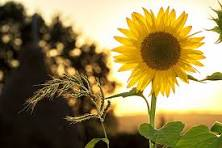

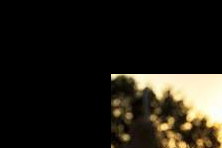

In [14]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def shift_image(image):
    # Get the dimensions of the image
    height, width = image.shape[:2]

    # Calculate the center of the image
    center = (width // 2, height // 2)

    # Define the translation matrix to shift the image to the center
    shift_matrix = np.float32([[1, 0, center[0]], [0, 1, center[1]]])

    # Perform the translation
    shifted_image = cv2.warpAffine(image, shift_matrix, (width, height))

    return shifted_image

# Specified input image path
input_image_path = "/content/drive/MyDrive/images.jpg"

# Read input image
input_image = cv2.imread(input_image_path)

# Shift the image
shifted_image = shift_image(input_image)

# Display the original and shifted images
cv2_imshow( input_image)
cv2_imshow( shifted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


display 45 degree rotated image

Enter the path of the input image: /content/drive/MyDrive/images.jpg


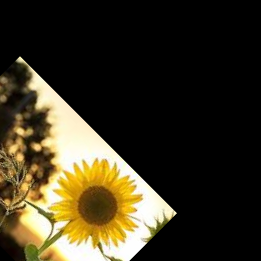

In [19]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def rotate_image(image, angle):
    # Get the dimensions of the image
    height, width = image.shape[:2]

    # Calculate the rotation matrix manually
    theta = np.radians(angle)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)

    # Calculate new image dimensions
    new_width = int(width * abs(cos_theta) + height * abs(sin_theta))
    new_height = int(width * abs(sin_theta) + height * abs(cos_theta))

    # Calculate the translation
    tx = (new_width - width) / 2
    ty = (new_height - height) / 2

    # Define the rotation matrix
    rotation_matrix = np.array([[cos_theta, -sin_theta, tx],
                                [sin_theta, cos_theta, ty]])

    # Perform the rotation
    rotated_image = cv2.warpAffine(image, rotation_matrix, (new_width, new_height))

    return rotated_image

# Read input image
input_image_path = input("Enter the path of the input image: ")
input_image = cv2.imread(input_image_path)

# Rotate the image by 45 degrees
angle = 45
rotated_image = rotate_image(input_image, angle)

# Display the rotated image
cv2_imshow( rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
